# Preprocessing

Segun hemos concluido en nuestro estudio de la base de datos ( EDA ) hacemos unas modificaciones en el Data Frame.

- Eliminamos 2 variables categoricas de segmentacion. Está carterizado y cliente BP.
- Variable Edad. Eliminaremos a los clientes entre los rangos de edad 0-25 y 90 y superiores.
- Fondos de Inversion y Planes de Pension son convertidas en variables booleanas. (0-1) Tiene o no tiene.  

Adcionalmente trabajamos con:

- Label Encoder - Convertir las variables categoricas en numero
- Outliers - Revision de posibles Ouliers
- Normalizacion - Llevar todas las variables a una escala comun
- PCA Posible simplificacion de variables reduciendo dimesionalidad a la base de datos


In [52]:
import pandas as pd
import numpy as np

In [53]:
# CAMBIAR SEGUN RUTA LOCAL HASTA UBICACION DEL REPOSITORIO
ruta = '/Users/manue/TFM'

In [54]:
#Leemos la base de datos y asociamos a la variable df el data set
df = pd.read_csv(ruta + '/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

### LABEL ENCODER

Basandonos en EDA realizado ,dentro de variables de segmentacion mantenemos solo 5 las cuales tenemos que transformar a numero para poder utilizarlas en el modelo.

In [46]:
variables_segmentacion =['seg_valor','camino_digital','seg_recorrido','marca_ccte','marca_bp']


In [51]:
df['seg_valor'].unique()

array(['ALTO', 'MEDIO', 'BAJO'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [5]:
for segmento in variables_segmentacion:
    df[segmento]=lbl.fit_transform(df[segmento])

In [7]:
# Confirmamos que la transformacion se ha realizado correctamente.  
df['seg_valor'].value_counts()

0    249593
2    134911
1     66870
Name: seg_valor, dtype: int64

In [8]:
df['seg_valor'].unique()

array([0, 2, 1])

## Adaptacion de Variables

In [9]:
# Eliminamos clientes de 0 a 24 años y de mas de 90 años
inf25 = df[df['edad'] < 25].index
# Eliminamos las filas de la base de datos
df.drop(inf25 , inplace=True)

In [10]:
# Eliminamos clientes de mas de 90 años
sup90 = df[df['edad'] > 90].index
# Eliminamos las filas de la base de datos
df.drop(sup90 , inplace=True)

In [11]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

### Estudio Outliers Edad

Hemos visto durante la exploracion del data set que existen distintas variables que son susceptibles de tener Outliers. Estas son 'edad','saldo_captacion','saldo_financiacion','saldo_ffii','saldo_plp'. 

- Variable Captacion. Son valores reales. No queremos eliminar outliers. Solamente modificamos los negativos y les damos valor 0 Euros.
- Fondos de inversion y planes de pension. Transformaremos a valor booleano 0-1 "Tiene no Tiene.
- Financiacion es una variable que por su naturaleza no queremos modificar.

- __Variable edad__. Es la unica que puede tener ouliers reales.  Hemos eliminado previamente clientes entre 0-25 años y superiores a 90 años por lo que probablemente los Outlier esten ya trabajados. 

__Variable EDAD__

Hacemos la visualizacion con un histograma y un BoxPlot. Con este ultimo confirmamos que no tenemos Outliers

In [12]:
import matplotlib.pyplot as plt
import pylab as pl

<AxesSubplot:>

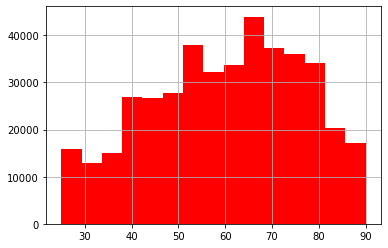

In [13]:
df['edad'].hist(color = 'r', bins = 15)

Boxplot edad


<function matplotlib.pyplot.show(close=None, block=None)>

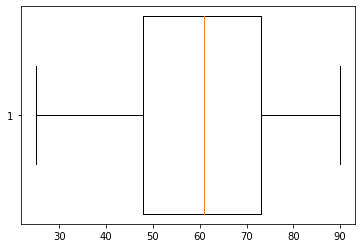

In [14]:
print ('Boxplot edad')
plt.boxplot(df['edad'],vert = False, widths = 2)
plt.show   


In [15]:
df['edad'].describe()

count    417812.000000
mean         59.915787
std          16.207368
min          25.000000
25%          48.000000
50%          61.000000
75%          73.000000
max          90.000000
Name: edad, dtype: float64

In [16]:
# Transformamos variable Planes de Pension 0 No tiene 1 Si tiene
df['saldo_plp'] = df['saldo_plp'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_plp'], normalize = True)

0    0.888785
1    0.111215
Name: saldo_plp, dtype: float64

In [17]:
# Transformamos variable Fondos de Inversion 0 No tiene 1 Si tiene
df['saldo_ffii'] = df['saldo_ffii'].apply(lambda x: 1 if x > 0 else 0)
pd.value_counts(df['saldo_ffii'], normalize = True)

0    0.859183
1    0.140817
Name: saldo_ffii, dtype: float64

In [18]:
# Variable Captacion. 
Clientes_con_saldos_negativos = df[df['saldo_captacion'] < 0]['cliente'].nunique()
Porcentaje_Clientes_con_saldos_negativos  = df[df['saldo_captacion'] < 0]['cliente'].nunique() / df['cliente'].count()
print ('Clientes_con_saldos_negativos :',Clientes_con_saldos_negativos)
print ('Porcentaje_Clientes_con_saldos_negativos: ',Porcentaje_Clientes_con_saldos_negativos)

Clientes_con_saldos_negativos : 8828
Porcentaje_Clientes_con_saldos_negativos:  0.021129120274190307


In [19]:
# No queremos los valores negativos. Les damos valor de cero.
df[df['saldo_captacion'] < 0] = 0

In [20]:
df['saldo_captacion'].describe()

count    4.178120e+05
mean     5.194882e+04
std      8.914284e+04
min      0.000000e+00
25%      2.189145e+03
50%      1.787874e+04
75%      6.811098e+04
max      5.290216e+06
Name: saldo_captacion, dtype: float64

In [21]:
# Df sin unidades de negocio
df=df[['saldo_captacion','saldo_financiacion','edad','seg_valor','saldo_ffii', 'saldo_plp', 
      'lp_dom_ingresos','camino_digital','seg_recorrido','marca_ccte','lp_seg_vida',
       'lp_seg_auto','marca_bp','lp_tjta_cto', 'lp_tjt_rev','lp_seg_acc','lp_seg_hogar']]

In [22]:
df.sample(5)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
216560,696.78,6784.51,56.0,1,0,0,0,2,0,2,0,0,0,1,1,0,0
306754,2537.44,5483.04,65.0,0,0,0,1,3,0,0,1,0,0,1,1,0,0
229289,205132.98,0.00,38.0,0,1,0,1,4,1,0,0,0,1,0,0,0,1
329141,26108.93,329406.78,58.0,0,0,1,1,4,0,0,1,0,1,1,1,1,0
87726,74591.77,1136.32,51.0,0,1,0,1,1,1,0,0,0,1,1,0,0,0


In [23]:
pwd

'C:\\Users\\manue\\TFM\\Financial-Product-Sales-Forecast-Model\\Preprocessing'

In [24]:
# Guardamos cvs
df.to_csv('df_encoded.csv', index = False)

### NORMALIZACION

Debemos llevar todas las varaibles a una escala comun. Para ello utilizamos MinMaxScaler.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
df_normalized = scaler.fit_transform(df)

In [28]:
columnas = df.columns

In [29]:
df_normalized = pd.DataFrame(df_normalized, columns=columnas)

In [30]:
df_normalized.head(3)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
0,0.251050,0.001689,0.766667,0.0,1.0,1.0,1.0,0.00,0.333333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.215915,0.001689,0.900000,0.0,1.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.215915,0.001689,0.833333,0.0,1.0,0.0,0.0,0.75,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# save to csv
df_normalized.to_csv('df_normalized.csv', index = False)

In [32]:
df_normalized.columns

Index(['saldo_captacion', 'saldo_financiacion', 'edad', 'seg_valor',
       'saldo_ffii', 'saldo_plp', 'lp_dom_ingresos', 'camino_digital',
       'seg_recorrido', 'marca_ccte', 'lp_seg_vida', 'lp_seg_auto', 'marca_bp',
       'lp_tjta_cto', 'lp_tjt_rev', 'lp_seg_acc', 'lp_seg_hogar'],
      dtype='object')

### PCA 

No lo consideramos necesario. Despues de haber reducido el Data Frame quedandonos unicamente con las columnas necesarias para el estudio del modelo, aun asi tenemos 17 variables que vamos a intentar reducir utilizando PCA para reducir la dimensionalidad. Compararemos si la utilizacion del PCA mejora o no el resultado.

In [33]:
from sklearn.decomposition import PCA

In [34]:
df_sin_target = df_normalized.drop(['lp_seg_hogar'], axis = 1)

In [35]:
pca = PCA(15) # n =  ponemos como numero de pcas 15
pca.fit(df_sin_target) # obtener los componentes principales
df_transforming = pca.transform(df_sin_target) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [36]:
pca.components_[14]

array([-4.11889824e-01,  9.10978607e-01,  1.31662563e-02,  4.99907493e-03,
        6.37255850e-03, -2.56658482e-03,  2.33568088e-04, -2.65712748e-03,
       -5.83886051e-03, -8.93539668e-05, -7.27455382e-03, -1.60054293e-03,
        9.98998533e-03,  1.29828400e-05, -6.78979411e-04, -4.71761888e-03])

In [37]:
list(zip(df_sin_target.columns, df_transforming[0]))

[('saldo_captacion', 1.0054773583346235),
 ('saldo_financiacion', 0.07789250191949051),
 ('edad', 0.38502292690306356),
 ('seg_valor', 0.3286855505328109),
 ('saldo_ffii', 0.5270259475547889),
 ('saldo_plp', 0.6200945446767393),
 ('lp_dom_ingresos', 0.9559897775616004),
 ('camino_digital', 0.11185132567008972),
 ('seg_recorrido', -0.10035165555479407),
 ('marca_ccte', -0.07430516952388962),
 ('lp_seg_vida', -0.37074753350110984),
 ('lp_seg_auto', -0.15791956357291642),
 ('marca_bp', -0.08083767823818092),
 ('lp_tjta_cto', -0.06358558882372542),
 ('lp_tjt_rev', -0.10212594774301068)]

In [39]:
print("shape X_pca", df_transforming.shape)
exp = pca.explained_variance_ratio_
print(exp)
print('sum:',sum(exp[0:15]))
#Vemos que con los 15 componentes tenemos el 99% de varianza explicada. Casi mismo numero de variables que sin PCA.

shape X_pca (417812, 15)
[2.43541531e-01 1.83785848e-01 1.14700429e-01 7.90322361e-02
 6.41066674e-02 6.02483731e-02 5.63915734e-02 4.43985341e-02
 4.40507526e-02 3.96533603e-02 3.31396132e-02 1.74401388e-02
 1.11996421e-02 8.10258599e-03 1.14564222e-04]
sum: 0.9999058499657828


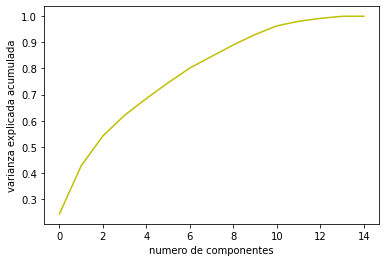

In [40]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_), color = 'y')
plt.xlabel('numero de componentes')
plt.ylabel('varianza explicada acumulada')
plt.show() 

In [41]:
# Damos un nombre a cada columna del DF una vez realizado el PCA.
df_pca = pd.DataFrame (data = df_transforming, columns = ['var_pca_1','var_pca_2','var_pca_3',
                                                          'var_pca_4','var_pca_5','var_pca_6',
                                                          'var_pca_7','var_pca_8','var_pca_9',
                                                          'var_pca_10','var_pca_11','var_pca_12',
                                                          'var_pca_13','var_pca_14','var_pca_15'])                          
                                                          

In [42]:
# Unimos nuestro Target al DF con PCA realizado.
df_normalized_pca = pd.concat ([df_pca, df_normalized [['lp_seg_hogar']]], axis = 1)

In [43]:
df_normalized_pca.to_csv('df_normalized_pca.csv', index = False)